# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# save api_keys information:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

In [6]:
# Performing a weather check on city using a series of API calls:

# Setting list for the loop call:
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []


# Print to logger:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters for printing log:
record_count = 1
set_count = 1


# Looping through all the cities in our list and performing a request:
for i, city in enumerate(cities):
       
    # Create the endpoint query_url with each city:
    city_url = query_url + city
    
    
    # Grouping cities in sets of 50 for with counters we set for printing log:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
      
    # Printing records with set numbers and counters:
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adding 1 to the record count for printing:
    record_count += 1

    # Running the API request for each of the cities 
    # (Using try & except)
    try:
        
        # Make request and store in json
        response = requests.get(city_url).json()
        
        
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        
        # Suspension time to prevent api from getting locked
        time.sleep(2)
        
    # Handle exceptions for experienced error, skip the city:
    except:
        # Append null values
        print("City not found. Skipping...")
        pass 
    
# Include a print log of each city as it'sbeing processed (with the city number and city name)              
# Print when data loading is complete: 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | fez
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | carutapera
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | san carlos de bariloche
Processing Record 15 of Set 1 | totoral
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | hovd
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | tucuman
Processing Re

Processing Record 35 of Set 4 | atar
Processing Record 36 of Set 4 | makakilo city
Processing Record 37 of Set 4 | buala
Processing Record 38 of Set 4 | tagusao
Processing Record 39 of Set 4 | constitucion
Processing Record 40 of Set 4 | sao gabriel da cachoeira
Processing Record 41 of Set 4 | plouzane
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | quatre cocos
Processing Record 44 of Set 4 | amarante do maranhao
Processing Record 45 of Set 4 | slave lake
Processing Record 46 of Set 4 | zhuhai
Processing Record 47 of Set 4 | tautira
Processing Record 48 of Set 4 | aktash
Processing Record 49 of Set 4 | hamilton
Processing Record 0 of Set 5 | baruun-urt
Processing Record 1 of Set 5 | burnie
Processing Record 2 of Set 5 | do rud
City not found. Skipping...
Processing Record 3 of Set 5 | gornopravdinsk
Processing Record 4 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 5 | grindavik
Processing Record 6 of Set 5 | fevralsk
City not foun

Processing Record 24 of Set 8 | severo-kurilsk
Processing Record 25 of Set 8 | fortuna
Processing Record 26 of Set 8 | udachnyy
Processing Record 27 of Set 8 | toshkivka
Processing Record 28 of Set 8 | alofi
Processing Record 29 of Set 8 | lobito
Processing Record 30 of Set 8 | gumdag
Processing Record 31 of Set 8 | rungata
City not found. Skipping...
Processing Record 32 of Set 8 | manokwari
Processing Record 33 of Set 8 | inuvik
Processing Record 34 of Set 8 | pinega
Processing Record 35 of Set 8 | jatai
Processing Record 36 of Set 8 | mayya
Processing Record 37 of Set 8 | biak
Processing Record 38 of Set 8 | svetlogorsk
Processing Record 39 of Set 8 | libreville
Processing Record 40 of Set 8 | tezu
Processing Record 41 of Set 8 | najran
Processing Record 42 of Set 8 | sosua
Processing Record 43 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 44 of Set 8 | goure
Processing Record 45 of Set 8 | viligili
City not found. Skipping...
Processing Record 46 of Set 8 |

Processing Record 10 of Set 12 | omutinskoye
City not found. Skipping...
Processing Record 11 of Set 12 | duku
Processing Record 12 of Set 12 | dibulla
Processing Record 13 of Set 12 | salinas
Processing Record 14 of Set 12 | gazanjyk
Processing Record 15 of Set 12 | isabela
Processing Record 16 of Set 12 | burns lake
Processing Record 17 of Set 12 | soubre
Processing Record 18 of Set 12 | naryan-mar
Processing Record 19 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 20 of Set 12 | vetlanda
Processing Record 21 of Set 12 | tonstad
Processing Record 22 of Set 12 | naze
Processing Record 23 of Set 12 | wilmington
Processing Record 24 of Set 12 | sitka
Processing Record 25 of Set 12 | islamkot
Processing Record 26 of Set 12 | jiroft
City not found. Skipping...
Processing Record 27 of Set 12 | jacareacanga
Processing Record 28 of Set 12 | renqiu
Processing Record 29 of Set 12 | balkanabat
Processing Record 30 of Set 12 | bonavista
Processing Record 31 of Set 12 | halifax

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Creating new dataframe for cities data:
city_data_df ={
    "City": city_data, 
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
     "Date": city_date}

weather_df = pd.DataFrame(city_data_df)
weather_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [8]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,54.18,77,76,1.01,ZA,1659199402
1,Bredasdorp,-34.5322,20.0403,50.11,88,93,7.43,ZA,1659199404
2,Chui,-33.6971,-53.4616,59.09,57,0,2.37,UY,1659199407
3,Fes,34.0372,-4.9998,104.25,19,40,8.05,MA,1659199409
4,Ushuaia,-54.8000,-68.3000,44.22,75,40,21.85,AR,1659199214


In [9]:
# Exporting the city data to .csv file:

weather_df.to_csv("../output_data/city_weather.csv", index=False, header=True)

In [23]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,21.176600,20.670408,71.219357,69.968696,56.947826,8.084522,1.659200e+09
std,32.766059,89.887571,14.259512,20.846270,37.850716,5.404386,3.916219e+02
min,-54.800000,-175.200000,36.900000,8.000000,0.000000,0.000000,1.659199e+09
25%,-5.211750,-58.457450,61.290000,60.000000,20.000000,4.000000,1.659200e+09
50%,24.781100,20.134700,73.650000,75.000000,70.000000,6.910000,1.659200e+09
75%,49.132900,107.025500,81.600000,85.000000,96.000000,10.915000,1.659200e+09
max,78.218600,179.316700,110.770000,100.000000,100.000000,32.210000,1.659201e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
# Inspecting the data for cities where the humidity > 100%: 

weather_df.loc[weather_df["Humidity"] >= 100]["Humidity"].count()

4

In [13]:
# Filtered data by humidity:
filtered_df = weather_df.loc[weather_df['Humidity'] < 100]

In [14]:
len(filtered_df)

571

In [15]:
# Checking the weather_df and comparing it to the filtered_df:
len(weather_df)

575

In [16]:
filtered_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,21.142849,20.471891,71.231681,69.758319,57.066550,8.096655,1.659200e+09
std,32.790870,89.949546,14.232107,20.766397,37.826925,5.407368,3.926131e+02
min,-54.800000,-175.200000,36.900000,8.000000,0.000000,0.000000,1.659199e+09
25%,-5.291400,-58.457450,61.290000,59.500000,20.000000,4.000000,1.659200e+09
50%,24.781100,20.040300,73.510000,75.000000,70.000000,6.910000,1.659200e+09
75%,49.132900,106.092100,81.600000,85.000000,96.000000,10.915000,1.659200e+09
max,78.218600,179.316700,110.770000,99.000000,100.000000,32.210000,1.659201e+09


In [67]:
#  Get the indices of cities that have humidity over 100%.
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_df[weather_df.Humidity > 100].index
over_100

Int64Index([], dtype='int64')

In [68]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(over_100, inplace=False)
#for x in over_100:
#    clean_city_data = weather_df.drop([x])
clean_city_data    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,54.18,77,76,1.01,ZA,1659199402
1,Bredasdorp,-34.5322,20.0403,50.11,88,93,7.43,ZA,1659199404
2,Chui,-33.6971,-53.4616,59.09,57,0,2.37,UY,1659199407
3,Fes,34.0372,-4.9998,104.25,19,40,8.05,MA,1659199409
4,Ushuaia,-54.8000,-68.3000,44.22,75,40,21.85,AR,1659199214
...,...,...,...,...,...,...,...,...,...
570,Lixouri,38.2019,20.4314,87.80,58,0,13.80,GR,1659200720
571,Arezzo,43.4724,11.8690,85.15,42,37,7.58,IT,1659200719
572,Kingisepp,59.3733,28.6134,62.67,70,21,4.70,RU,1659200724
573,Kibi,6.1649,-0.5538,78.73,68,98,3.69,GH,1659200727


In [27]:
# Extract relevant fields from the cleaned dataframe
lat = clean_city_data .Lat
max_temp = clean_city_data ["Max Temp"]
humid = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data['Wind Speed']

# Export the clean_city_data into a csv:
clean_city_data.to_csv("../output_data/clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

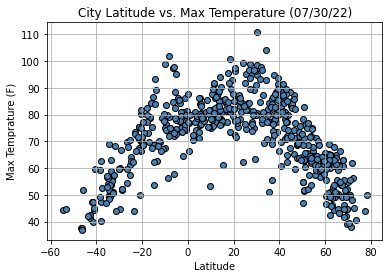

In [28]:
# Plot 1: Latitude vs. Temperature Plot
x_values = lat
y_values = max_temp

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

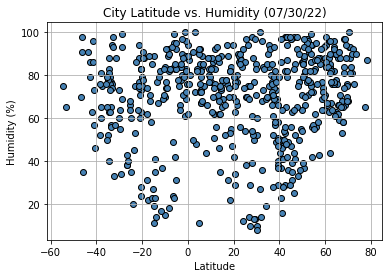

In [29]:
# Plot 2: Latitude vs. Humidity Plot
x_values = lat
y_values = humid

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

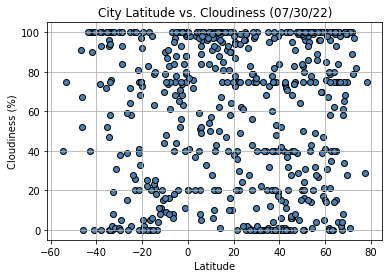

In [32]:
# Plot 3: Latitude vs. Cloudiness Plot
x_values = lat
y_values = cloud

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

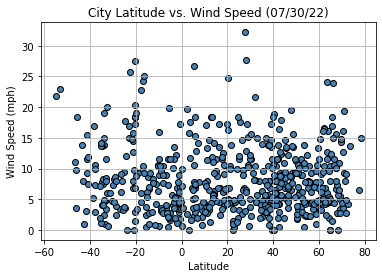

In [33]:
# Plot 4: Latitude vs. Wind Speed Plot
x_values = lat
y_values = wind

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_wind.png")
plt.show()

## Linear Regression

In [34]:
# Creating northern and southern hemisphere dataframe for linear regression:

north_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 1.2660776548140936e-60
The r-value is: -0.7000802903421495


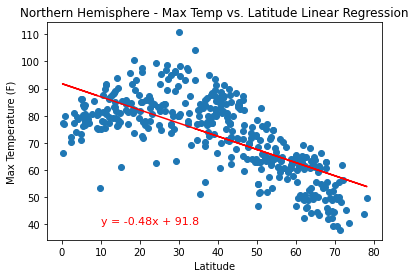

In [44]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_temp_lg.png")
plt.show() 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 4.550660963459712e-42
The r-value is: 0.8146083168546807


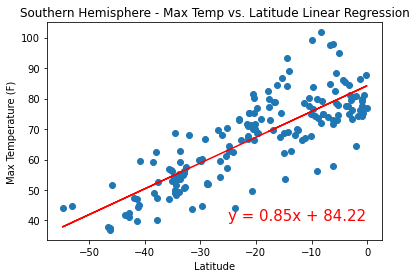

In [46]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 2: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_temp_lg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 0.06307478516362777
The r-value is: 0.09267517057308994


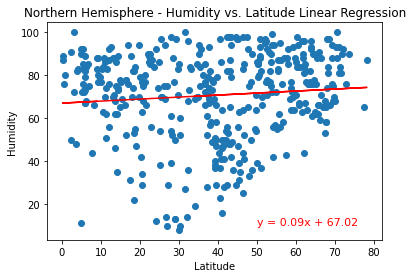

In [50]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Humidity vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_humidity_lt.png")
plt.show() 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 0.4673833121453076
The r-value is: 0.05577720724479526


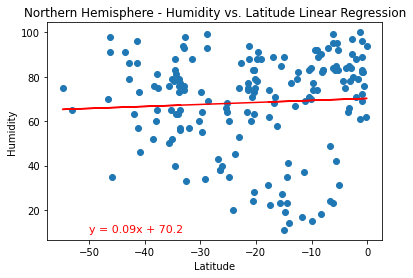

In [52]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Southern Hemisphere - Humidity vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_humidity_lt.png")
plt.show() 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 0.5693426835969916
The r-value is: -0.02842746821829455


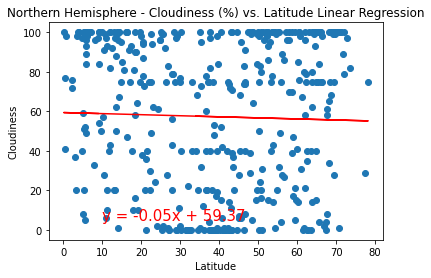

In [64]:
#Northern Hemisphere -  Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_cloud_lt.png")
plt.show() 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 0.6202796716544368
The r-value is: -0.038041730330030075


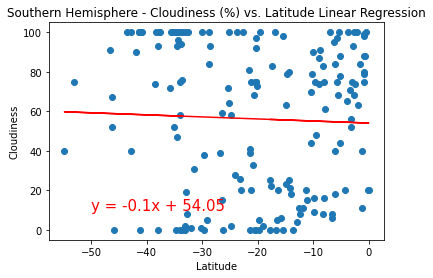

In [63]:
#Southern Hemisphere -  Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/South_cloud_lt.png")
plt.show() 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 0.9348669623655211
The r-value is: 0.00408358155098608


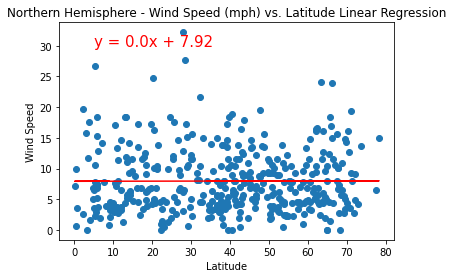

In [62]:
#Northern Hemisphere -  Wind Speed (mph) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_wind_lt.png")
plt.show() 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 0.004856252664586112
The r-value is: -0.21381965657732777


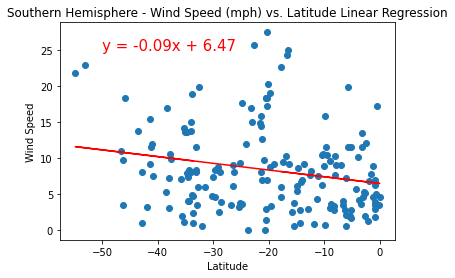

In [66]:
#Southern Hemisphere -  Wind Speed (mph) vs. Latitude Linear Regression
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_wind_lt.png")
plt.show() 

## Written description of three observable trends based on the data:
>* For regions that are close to the equator there is a trend of increased temperature for both the northern and southern hemispheres. This is reasonable given the progressive distance from the equator both north and south, respectively.   
>* Across both the northern and southern hemispheres humidity is mostly over 60%, and it trends opposite to temperature, which is accurate given relative humidity increases with decreasing temperature.  
>* For both hemispheres wind speed was generally below 20 miles per hour irrespective of latitude. This appears reasonable given wind speed is determined by pressure differentials across regions and not latitutde. 
>* Cloudiness across both hemispheres was variable and displayed no pattern based on latitude, this is similar to wind speed. 
****